In [62]:
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np 

In [63]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [77]:
from pathlib import Path

csv_candidates = [
	Path("FMsocial-deter.csv"),
    Path("data/FMsocial-deter.csv"),
]

search_roots = [Path.cwd(), *Path.cwd().parents]
csv_path = None
for root in search_roots:
	csv_path = next((root / p for p in csv_candidates if (root / p).exists()), None)
	if csv_path is not None:
		break

if csv_path is None:
	csv_path = next(Path.cwd().rglob("*.csv"), None)

if csv_path is None:
	print("No CSV file found. Please place a CSV file in the project folder.")
	df = pd.DataFrame()
else:
	df = pd.read_csv(csv_path)
	print(df.dtypes)

ST                int64
STATE            object
ST_ABBR          object
STCNTY            int64
COUNTY           object
FIPS              int64
LOCATION         object
AREA_SQMI       float64
E_TOTPOP          int64
M_TOTPOP          int64
E_HU              int64
M_HU              int64
E_HH              int64
M_HH              int64
E_POV150          int64
M_POV150          int64
E_UNEMP           int64
M_UNEMP           int64
E_HBURD           int64
M_HBURD           int64
E_NOHSDP          int64
M_NOHSDP          int64
E_UNINSUR         int64
M_UNINSUR         int64
E_AGE65           int64
M_AGE65           int64
E_AGE17           int64
M_AGE17           int64
E_DISABL          int64
M_DISABL          int64
E_SNGPNT          int64
M_SNGPNT          int64
E_LIMENG          int64
M_LIMENG          int64
E_MINRTY          int64
M_MINRTY          int64
E_MUNIT           int64
M_MUNIT           int64
E_MOBILE          int64
M_MOBILE          int64
E_CROWD           int64
M_CROWD         

In [78]:
rename_map = {
    "ST": "state_fips",
    "STATE": "state_name",
    "ST_ABBR": "state_abbreviation",
    "STCNTY": "county_fips",
    "COUNTY": "county_name",
    "FIPS": "zcta_fips",
    "LOCATION": "location_name",
    "AREA_SQMI": "area_sq_miles",

    "E_TOTPOP": "total_population",
    "M_TOTPOP": "total_population_moe",
    "E_HU": "housing_units",
    "M_HU": "housing_units_moe",
    "E_HH": "households",
    "M_HH": "households_moe",

    "E_POV150": "population_below_150_percent_poverty",
    "M_POV150": "population_below_150_percent_poverty_moe",
    "EP_POV150": "pct_below_150_percent_poverty",
    "MP_POV150": "pct_below_150_percent_poverty_moe",

    "E_UNEMP": "unemployed_population_16_plus",
    "M_UNEMP": "unemployed_population_16_plus_moe",
    "EP_UNEMP": "pct_unemployed",
    "MP_UNEMP": "pct_unemployed_moe",

    "E_HBURD": "housing_cost_burdened_households",
    "M_HBURD": "housing_cost_burdened_households_moe",
    "EP_HBURD": "pct_housing_cost_burdened",
    "MP_HBURD": "pct_housing_cost_burdened_moe",

    "E_NOHSDP": "population_no_high_school_diploma",
    "M_NOHSDP": "population_no_high_school_diploma_moe",
    "EP_NOHSDP": "pct_no_high_school_diploma",
    "MP_NOHSDP": "pct_no_high_school_diploma_moe",

    "E_UNINSUR": "uninsured_population",
    "M_UNINSUR": "uninsured_population_moe",
    "EP_UNINSUR": "pct_uninsured",
    "MP_UNINSUR": "pct_uninsured_moe",

    "E_AGE65": "population_age_65_plus",
    "M_AGE65": "population_age_65_plus_moe",
    "EP_AGE65": "pct_age_65_plus",
    "MP_AGE65": "pct_age_65_plus_moe",

    "E_AGE17": "population_age_17_and_under",
    "M_AGE17": "population_age_17_and_under_moe",
    "EP_AGE17": "pct_age_17_and_under",
    "MP_AGE17": "pct_age_17_and_under_moe",

    "E_DISABL": "population_with_disability",
    "M_DISABL": "population_with_disability_moe",
    "EP_DISABL": "pct_with_disability",
    "MP_DISABL": "pct_with_disability_moe",

    "E_SNGPNT": "single_parent_households",
    "M_SNGPNT": "single_parent_households_moe",
    "EP_SNGPNT": "pct_single_parent_households",
    "MP_SNGPNT": "pct_single_parent_households_moe",

    "E_LIMENG": "population_limited_english",
    "M_LIMENG": "population_limited_english_moe",
    "EP_LIMENG": "pct_limited_english",
    "MP_LIMENG": "pct_limited_english_moe",

    "E_MINRTY": "minority_population",
    "M_MINRTY": "minority_population_moe",
    "EP_MINRTY": "pct_minority",
    "MP_MINRTY": "pct_minority_moe",

    "E_MUNIT": "housing_units_multi_unit",
    "M_MUNIT": "housing_units_multi_unit_moe",
    "EP_MUNIT": "pct_multi_unit_housing",
    "MP_MUNIT": "pct_multi_unit_housing_moe",

    "E_MOBILE": "mobile_homes",
    "M_MOBILE": "mobile_homes_moe",
    "EP_MOBILE": "pct_mobile_homes",
    "MP_MOBILE": "pct_mobile_homes_moe",

    "E_CROWD": "crowded_households",
    "M_CROWD": "crowded_households_moe",
    "EP_CROWD": "pct_crowded_households",
    "MP_CROWD": "pct_crowded_households_moe",

    "E_NOVEH": "households_no_vehicle",
    "M_NOVEH": "households_no_vehicle_moe",
    "EP_NOVEH": "pct_households_no_vehicle",
    "MP_NOVEH": "pct_households_no_vehicle_moe",

    "E_GROUPQ": "population_in_group_quarters",
    "M_GROUPQ": "population_in_group_quarters_moe",
    "EP_GROUPQ": "pct_population_in_group_quarters",
    "MP_GROUPQ": "pct_population_in_group_quarters_moe",

    "RPL_THEME1": "socioeconomic_vulnerability_rank",
    "RPL_THEME2": "household_vulnerability_rank",
    "RPL_THEME3": "minority_vulnerability_rank",
    "RPL_THEME4": "housing_transportation_vulnerability_rank",
    "RPL_THEMES": "overall_social_vulnerability_rank",

    "SPL_THEME1": "socioeconomic_vulnerability_score",
    "SPL_THEME2": "household_vulnerability_score",
    "SPL_THEME3": "minority_vulnerability_score",
    "SPL_THEME4": "housing_transportation_vulnerability_score",
    "SPL_THEMES": "overall_vulnerability_score"
}

df = df.rename(columns=rename_map)

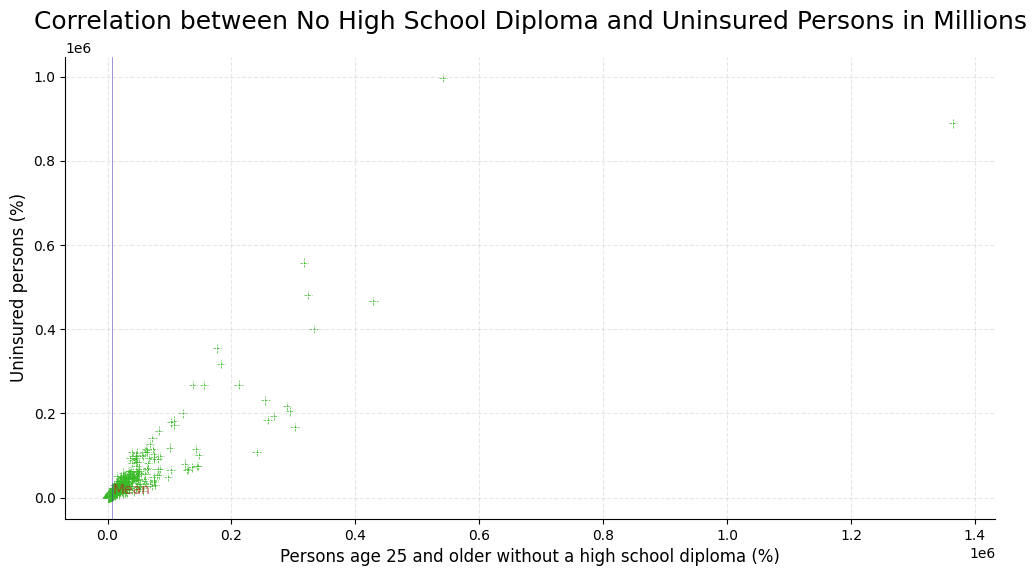

In [66]:
plt.figure(figsize=(12, 6))

plt.scatter(
    df['population_no_high_school_diploma'],
    df['uninsured_population'],
    marker='+',
    linestyle='--',
    color='#37BA26',
    linewidth=0.5
)

plt.xlabel("Persons age 25 and older without a high school diploma (%)", fontsize=12)
plt.ylabel("Uninsured persons (%)", fontsize=12)
plt.title("Correlation between No High School Diploma and Uninsured Persons in Millions", fontsize=18, pad=20)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

mean_x = df["population_no_high_school_diploma"].mean()
mean_y = df["uninsured_population"].mean()
ax.axvline(
    mean_x,
    color="#4426BAB9",
    linewidth=0.5,
    alpha=0.7
)

ax.text(
    mean_x + 0.5,
    mean_y,
    "Mean",
    color="#BA2626B9",
    fontsize=10
)

ax.grid(True, linestyle="--", alpha=0.3)

plt.show()

In [67]:
# Ensure dataframe 'df' is available (load it if not already defined)
if 'pd' not in globals():
	import pandas as pd

if 'df' not in globals():
	df = pd.read_csv('FrancineMassaro_socialdet.csv.csv')

print("All columns in the dataset:")
print(df.columns.tolist())

All columns in the dataset:
['state_fips', 'state_name', 'state_abbreviation', 'county_fips', 'county_name', 'zcta_fips', 'location_name', 'area_sq_miles', 'total_population', 'total_population_moe', 'housing_units', 'housing_units_moe', 'households', 'households_moe', 'population_below_150_percent_poverty', 'population_below_150_percent_poverty_moe', 'unemployed_population_16_plus', 'unemployed_population_16_plus_moe', 'housing_cost_burdened_households', 'housing_cost_burdened_households_moe', 'population_no_high_school_diploma', 'population_no_high_school_diploma_moe', 'uninsured_population', 'uninsured_population_moe', 'population_age_65_plus', 'population_age_65_plus_moe', 'population_age_17_and_under', 'population_age_17_and_under_moe', 'population_with_disability', 'population_with_disability_moe', 'single_parent_households', 'single_parent_households_moe', 'population_limited_english', 'population_limited_english_moe', 'minority_population', 'minority_population_moe', 'housing_u

In [68]:
print(df.shape)
df.head(10)

(3144, 158)


,state_fips,state_name,state_abbreviation,county_fips,county_name,zcta_fips,location_name,area_sq_miles,total_population,total_population_moe,housing_units,housing_units_moe,households,households_moe,population_below_150_percent_poverty,population_below_150_percent_poverty_moe,unemployed_population_16_plus,unemployed_population_16_plus_moe,housing_cost_burdened_households,housing_cost_burdened_households_moe,population_no_high_school_diploma,population_no_high_school_diploma_moe,uninsured_population,uninsured_population_moe,population_age_65_plus,population_age_65_plus_moe,population_age_17_and_under,population_age_17_and_under_moe,population_with_disability,population_with_disability_moe,single_parent_households,single_parent_households_moe,population_limited_english,population_limited_english_moe,minority_population,minority_population_moe,housing_units_multi_unit,housing_units_multi_unit_moe,mobile_homes,mobile_homes_moe,crowded_households,crowded_households_moe,households_no_vehicle,households_no_vehicle_moe,population_in_group_quarters,population_in_group_quarters_moe,pct_below_150_percent_poverty,pct_below_150_percent_poverty_moe,pct_unemployed,pct_unemployed_moe,pct_housing_cost_burdened,pct_housing_cost_burdened_moe,pct_no_high_school_diploma,pct_no_high_school_diploma_moe,pct_uninsured,pct_uninsured_moe,pct_age_65_plus,pct_age_65_plus_moe,pct_age_17_and_under,pct_age_17_and_under_moe,pct_with_disability,pct_with_disability_moe,pct_single_parent_households,pct_single_parent_households_moe,pct_limited_english,pct_limited_english_moe,pct_minority,pct_minority_moe,pct_multi_unit_housing,pct_multi_unit_housing_moe,pct_mobile_homes,pct_mobile_homes_moe,pct_crowded_households,pct_crowded_households_moe,pct_households_no_vehicle,pct_households_no_vehicle_moe,pct_population_in_group_quarters,pct_population_in_group_quarters_moe,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,socioeconomic_vulnerability_score,socioeconomic_vulnerability_rank,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,household_vulnerability_score,household_vulnerability_rank,EPL_MINRTY,minority_vulnerability_score,minority_vulnerability_rank,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,housing_transportation_vulnerability_score,housing_transportation_vulnerability_rank,overall_vulnerability_score,overall_social_vulnerability_rank,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,1,Alabama,AL,1001,Autauga County,1001,"Autauga County, Alabama",594.454786,58761,0,24457,41,22308,369,11780,1363,752,215,4389,582,3857,512,4225,753,9176,98,13766,42,9425,631,1247,296,203,198,16126,224,970,374,3805,440,307,163,888,237,551,21,20.2,2.3,2.8,0.8,19.7,2.6,9.6,1.3,7.4,1.3,15.6,0.2,23.4,0.1,16.4,1.1,5.6,1.3,0.4,0.4,27.4,0.4,3.9,1.5,15.6,1.8,1.4,0.7,4.0,1.1,0.9,0.0,0.3621,0.1457,0.3388,0.4276,0.4120,1.6862,0.2367,0.1718,0.6962,0.5581,0.5304,0.3150,2.2715,0.3675,0.6354,0.6354,0.6354,0.5921,0.6892,0.3198,0.2491,0.1091,1.9593,0.2358,6.5524,0.2663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42938,2425,385,11496,525,1864,0,636,213,59,71,0,30,1930,598,141,183,10.9,1.7,19.6,0.9,3.2,0.0,1.1,0.4,0.1,0.1,0.0,0.1,3.3,1.0,0.2,0.3
1,1,Alabama,AL,1003,Baldwin County,1003,"Baldwin County, Alabama",1589.861817,233420,0,125113,85,90802,1229,42088,2875,3825,609,21039,1527,14031,1216,21472,1920,49499,64,49396,0,31878,1668,3849,567,1741,496,41259,1020,20730,1122,12752,1015,1801,432,2056,396,3401,75,18.3,1.3,3.4,0.6,23.2,1.7,8.4,0.7,9.3,0.8,21.2,0.1,21.2,0.0,13.9,0.7,4.2,0.6,0.8,0.2,17.7,0.4,16.6,0.9,10.2,0.8,1.9,0.5,2.3,0.4,1.5,0.0,0.2638,0.2393,0.6297,0.3303,0.5

In [69]:
if 'csv_path' in globals() and csv_path is not None:
    df = pd.read_csv(csv_path)
else:
    df = pd.read_csv('FMsocial-deter.csv')

columns_to_delete = [
    "E_MINRTY",
    "M_MINRTY",
    "EP_MINRTY",
    "MP_MINRTY"
]

df = df.drop(columns=columns_to_delete, errors="ignore")

In [79]:
df.isna()
df.isna().sum()

state_fips                                    0
state_name                                    0
state_abbreviation                            0
county_fips                                   0
county_name                                   0
zcta_fips                                     0
location_name                                 0
area_sq_miles                                 0
total_population                              0
total_population_moe                          0
housing_units                                 0
housing_units_moe                             0
households                                    0
households_moe                                0
population_below_150_percent_poverty          0
population_below_150_percent_poverty_moe      0
unemployed_population_16_plus                 0
unemployed_population_16_plus_moe             0
housing_cost_burdened_households              0
housing_cost_burdened_households_moe          0
population_no_high_school_diploma       

In [81]:
df.duplicated(keep=False).sum()

np.int64(0)

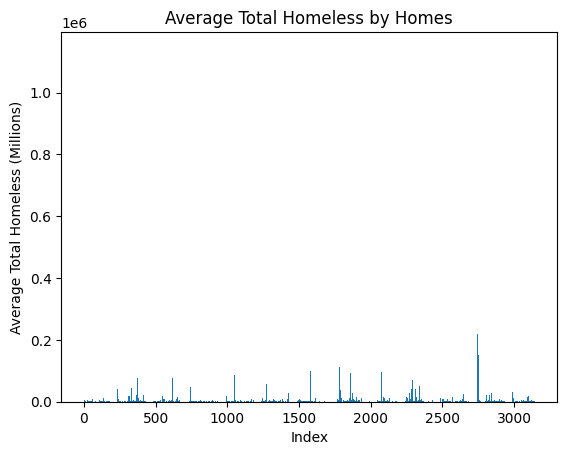

In [72]:
# use the existing Series 'housing_burden' (from df['E_HBURD'])
if 'housing_burden' not in globals():
	housing_burden = df['E_HBURD']

plt.bar(housing_burden.index, housing_burden.values)
plt.xlabel("Index")
plt.ylabel("Average Total Homeless (Millions)")
plt.title("Average Total Homeless by Homes")
plt.show()

In [73]:
df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

plt.plot(
    df['M_NOVEH'],
    df['M_NOINT'],
    marker='+',
    linestyle='--',
    color='#37BA26',
    linewidth=0.5
)

plt.xlabel("Households with no vehicle available (%)", fontsize=12)
plt.ylabel("Households with no internet access (%)", fontsize=12)
plt.title("Correlation between No Vehicle Availability and No Internet Access", fontsize=18, pad=20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

mean_x = df['M_NOVEH'].mean()
mean_y = df['M_NOINT'].mean()
ax.axvline(
    mean_x,
    color="#37BA26BA",
    linewidth=0.5,
    alpha=0.7
)

ax.text(
    mean_x + 0.5, 
    mean_y,
    "Mean",
    color="#37BA26BA",
    fontsize=10
)

ax.grid(True, linestyle='--', alpha=0.3)

plt.show()


NameError: name 'data' is not defined

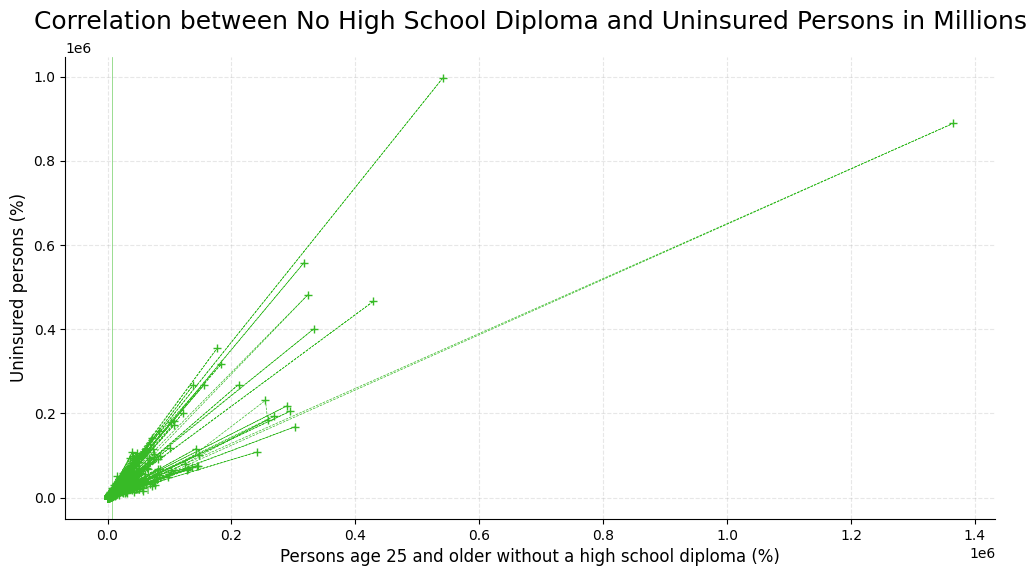

In [76]:
plt.figure(figsize=(12, 6))

plt.plot(
    df['E_NOHSDP'],
    df['E_UNINSUR'],
    marker='+',
    linestyle='--',
    color='#37BA26',
    linewidth=0.5
)

plt.xlabel("Persons age 25 and older without a high school diploma (%)", fontsize=12)
plt.ylabel("Uninsured persons (%)", fontsize=12)
plt.title("Correlation between No High School Diploma and Uninsured Persons in Millions", fontsize=18, pad=20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

mean_x = df['E_NOHSDP'].mean()
mean_y = df['E_UNINSUR'].mean()
ax.axvline(
    mean_x,
    color="#37BA26BA",
    linewidth=0.5,
    alpha=0.7
)

ax.text(
    mean_x + 0.5, 
    mean_y,
    "Mean",
    color="#37BA26BA",
    fontsize=10
)

ax.grid(True, linestyle='--', alpha=0.3)

plt.show()
